# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre:

Apellidos:

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.


El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import dash
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc


# Análisis descriptivos


In [17]:
df = pd.read_csv("/Users/rimtyouss/Documents/QUINTO/DESAROLLO DE APP/FINAL_RIM/housing_time_series_by_madrid_neighbourhood.csv")
print(df.head())
print(df.info())
print(df.describe())

#convertir a datetime
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
#por si acasoo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month



  neighbourhood_group        date  m2_price  inflation  HICP  \
0              Centro  2010-08-01      15.3        0.3   1.6   
1              Centro  2011-01-01      15.6       -0.7   3.0   
2              Centro  2011-02-01      15.4        0.1   3.4   
3              Centro  2011-05-01      15.0        0.0   3.4   
4              Centro  2011-06-01      15.0       -0.1   3.0   

   population_density  listings_count  minimum_nights  nigth_price  \
0                 796               1             2.0   114.000000   
1                 800               1             2.0   114.000000   
2                 800               4             7.0   184.000000   
3                 800               5             9.6    61.000000   
4                 800               5             5.4   135.333333   

   availability_365  listing_reviews  number_of_reviews  reviews_per_month  \
0            305.00                1              155.0             0.9000   
1            305.00                1  

In [22]:
#Analisis exploratori

#1. Cuántos barrios hay en Madrid?
print(df['neighbourhood_group'].nunique())

#2. Precio medio de todos los barrios
print(df.groupby('neighbourhood_group')['m2_price'].mean())



18
neighbourhood_group
Arganzuela            13.823507
Barajas               11.194508
Carabanchel           10.881736
Centro                16.231677
Chamartín             15.048115
Chamberí              16.279343
Ciudad Lineal         12.453770
Hortaleza             11.935000
Latina                10.803206
Moratalaz             10.579722
Puente de Vallecas    11.004237
Retiro                14.442734
Salamanca             16.915515
Tetuán                14.246279
Usera                 10.917080
Vicálvaro             10.347778
Villa de Vallecas     11.041978
Villaverde            10.023661
Name: m2_price, dtype: float64
neighbourhood_group
Centro                155
Retiro                139
Hortaleza             138
Chamberí              137
Salamanca             136
Arganzuela            134
Latina                131
Tetuán                129
Ciudad Lineal         122
Barajas               122
Chamartín             122
Carabanchel           121
Puente de Vallecas    118
Usera       

In [23]:
#3.Cuantas cosas hay por barrio
print(df['neighbourhood_group'].value_counts())



neighbourhood_group
Centro                155
Retiro                139
Hortaleza             138
Chamberí              137
Salamanca             136
Arganzuela            134
Latina                131
Tetuán                129
Ciudad Lineal         122
Barajas               122
Chamartín             122
Carabanchel           121
Puente de Vallecas    118
Usera                 113
Villaverde            112
Moratalaz             108
Villa de Vallecas      91
Vicálvaro              90
Name: count, dtype: int64


In [13]:
df.head()
df = df.dropna()



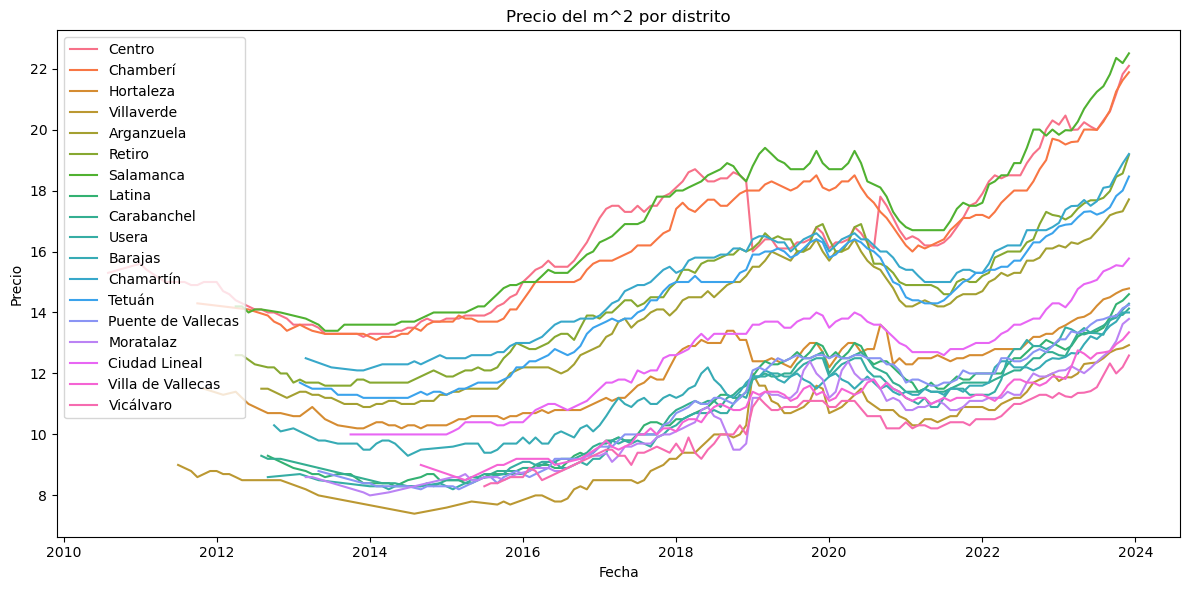

In [14]:
#1. Graf. temporal m^2
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='m2_price', hue='neighbourhood_group')
plt.title("Precio del m^2 por distrito")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 2. Distribución del precio por m^2
plt.figure(figsize=(8,6))
sns.histplot(df['m2_price'], kde=True)
plt.title("Distribución del precio por m²")
plt.xlabel("Precio m^2")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

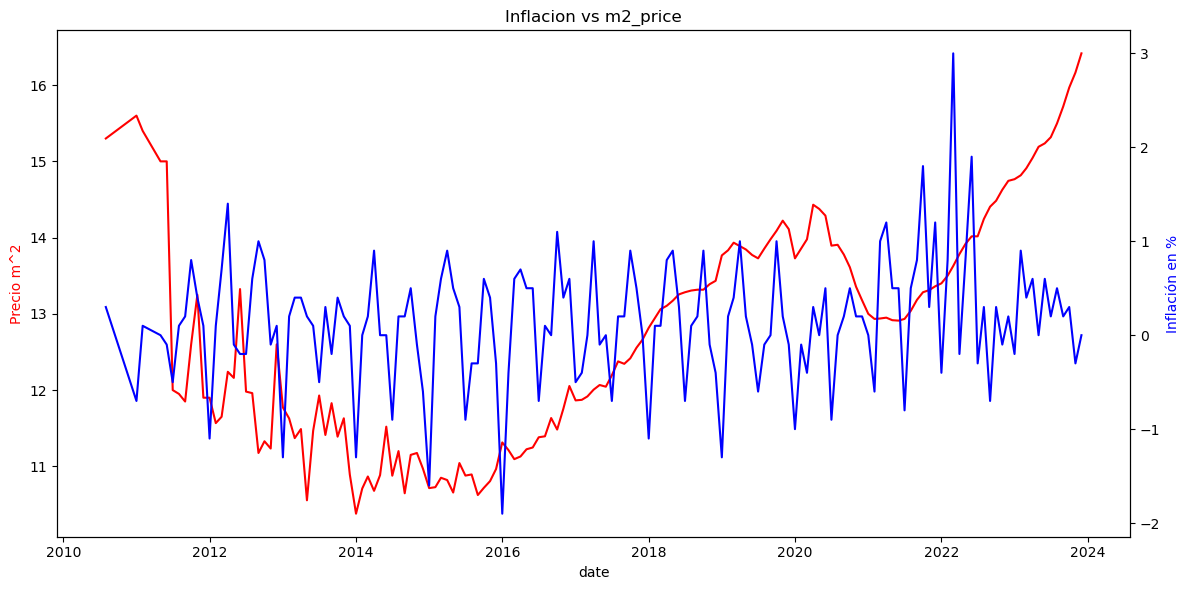

In [26]:
# 3. Inflacion vs m2_price 
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=df.groupby('date', as_index=False)['m2_price'].mean(), x='date', y='m2_price', ax=ax1, color='red')
ax1.set_ylabel('Precio m^2', color='red')
ax2 = ax1.twinx()
sns.lineplot(data=df.groupby('date', as_index=False)['inflation'].mean(), x='date', y='inflation', ax=ax2, color='blue')
ax2.set_ylabel('Inflación en %', color='blue')
plt.title("Inflacion vs m2_price")
plt.tight_layout()
plt.show()

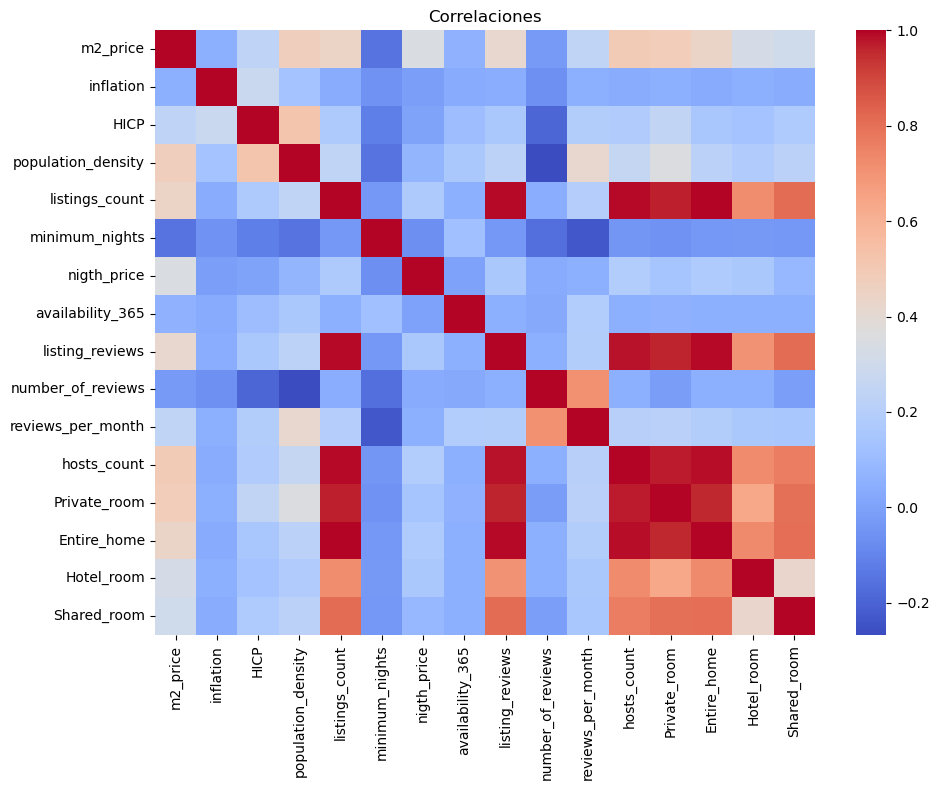

In [27]:
# 4. Heatmap
numeric_cols = ['m2_price', 'inflation', 'HICP', 'population_density',
                'listings_count', 'minimum_nights', 'nigth_price',
                'availability_365', 'listing_reviews', 'number_of_reviews',
                'reviews_per_month', 'hosts_count', 'Private_room',
                'Entire_home', 'Hotel_room', 'Shared_room']
corr = df[numeric_cols].corr()de 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlaciones")
plt.tight_layout()
plt.show()

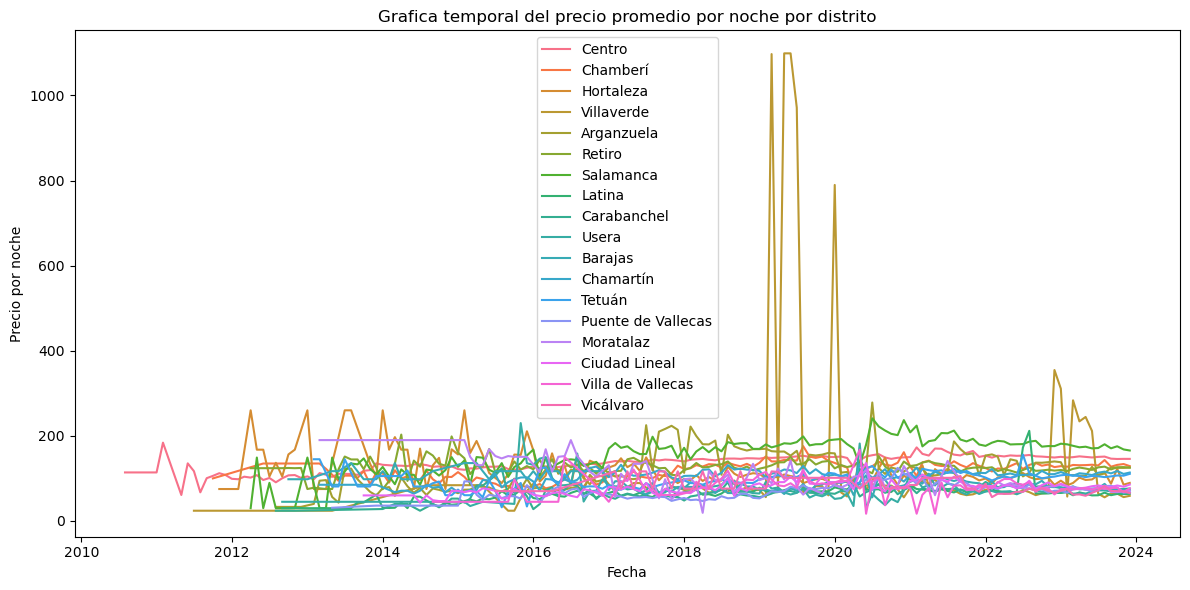

In [28]:
# 5. recio por noche  por distrito
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='nigth_price', hue='neighbourhood_group')
plt.title("Grafica temporal del precio promedio por noche por distrito")
plt.xlabel("Fecha")
plt.ylabel("Precio por noche")
plt.legend()
plt.tight_layout()
plt.show()

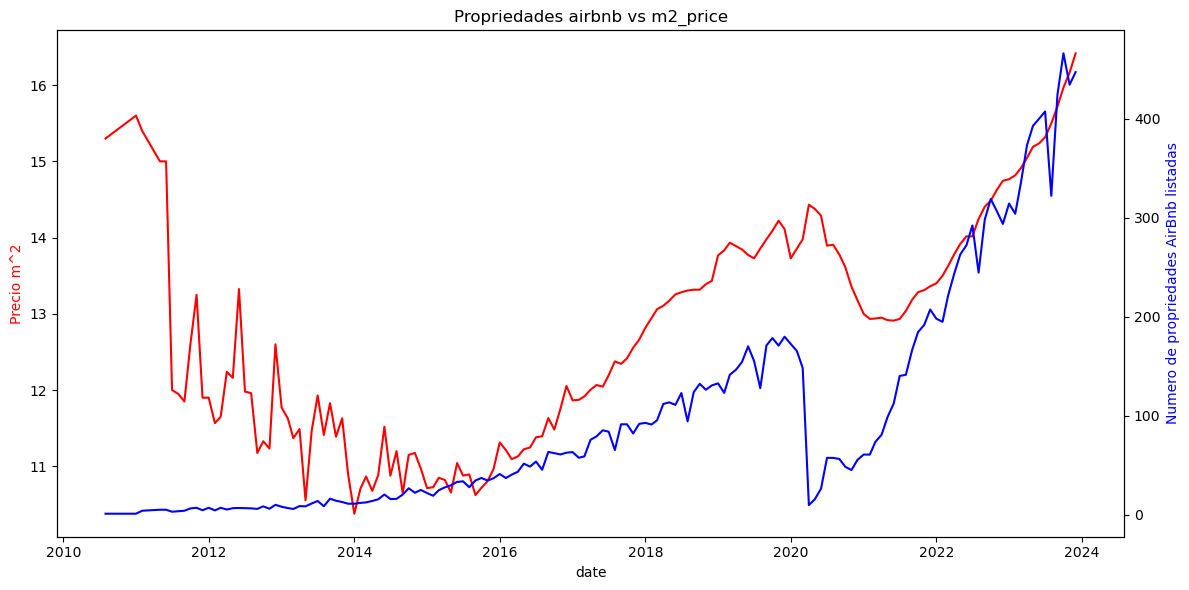

In [45]:
# 3. Inflacion vs m2_price 
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=df.groupby('date', as_index=False)['m2_price'].mean(), x='date', y='m2_price', ax=ax1, color='red')
ax1.set_ylabel('Precio m^2', color='red')
ax2 = ax1.twinx()
sns.lineplot(data=df.groupby('date', as_index=False)['listings_count'].mean(), x='date', y='listings_count', ax=ax2, color='blue')
ax2.set_ylabel('Numero de propriedades AirBnb listadas', color='blue')
plt.title("Propriedades airbnb vs m2_price")
plt.tight_layout()
plt.show()

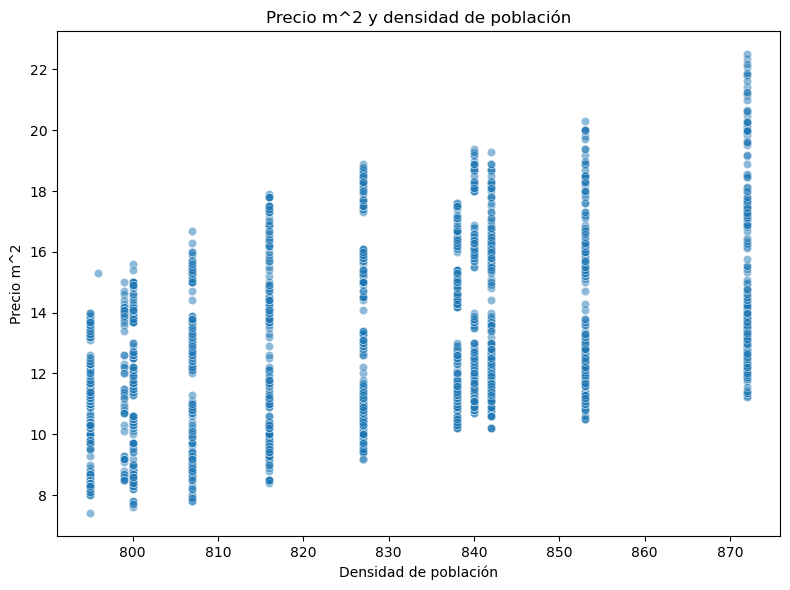

In [46]:
#6. m2_price vs population_density
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='population_density', y='m2_price', alpha=0.5)
plt.title("Precio m^2 y densidad de población")
plt.xlabel("Densidad de población")
plt.ylabel("Precio m^2")
plt.tight_layout()
plt.show()

/var/folders/jy/h3d7x0px349032vjtclsskhm0000gn/T/ipykernel_77444/1483762579.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


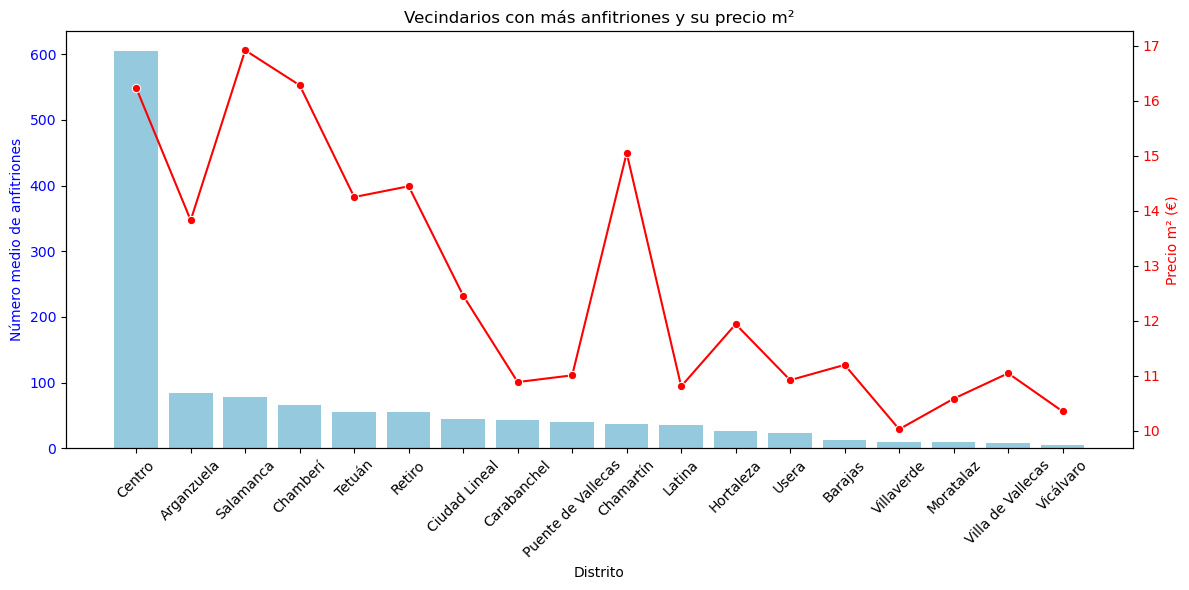

In [47]:
agg_neigh = df.groupby('neighbourhood_group', as_index=False).agg({
    'hosts_count':'mean',
    'm2_price':'mean'
})

fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=agg_neigh.sort_values('hosts_count', ascending=False), x='neighbourhood_group', y='hosts_count', ax=ax1, color='skyblue')
ax1.set_xlabel("Distrito")
ax1.set_ylabel("Número medio de anfitriones", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=agg_neigh.sort_values('hosts_count', ascending=False), x='neighbourhood_group', y='m2_price', ax=ax2, color='red', marker='o')
ax2.set_ylabel("Precio m² (€)", color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title("Vecindarios con más anfitriones y su precio m²")
plt.tight_layout()
plt.show()


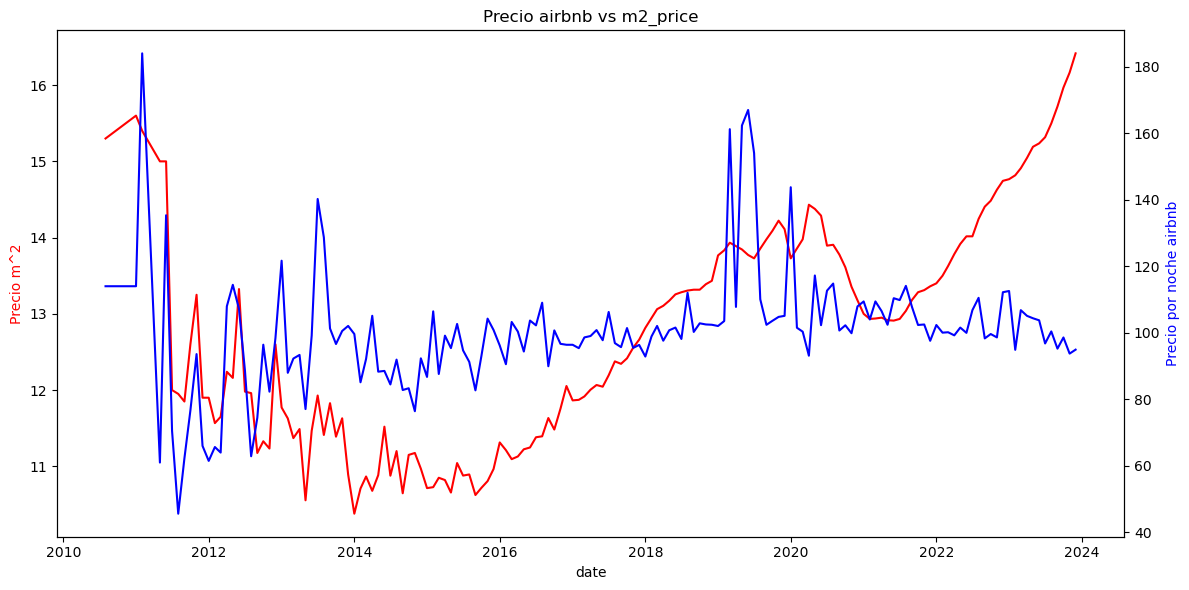

In [51]:
# 3. Precio airbnb vs m2_price 
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=df.groupby('date', as_index=False)['m2_price'].mean(), x='date', y='m2_price', ax=ax1, color='red')
ax1.set_ylabel('Precio m^2', color='red')
ax2 = ax1.twinx()
sns.lineplot(data=df.groupby('date', as_index=False)['nigth_price'].mean(), x='date', y='nigth_price', ax=ax2, color='blue')
ax2.set_ylabel('Precio por noche airbnb', color='blue')
plt.title("Precio airbnb vs m2_price")
plt.tight_layout()
plt.show()

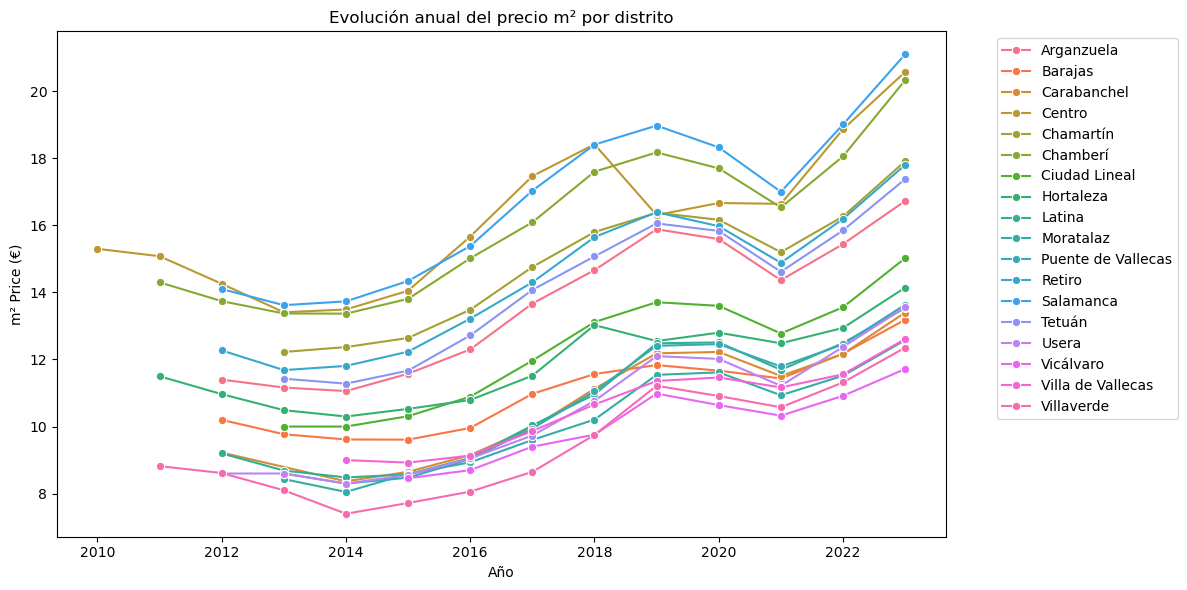

In [48]:
df['year'] = df['date'].dt.year
yearly_price = df.groupby(['neighbourhood_group','year'], as_index=False)['m2_price'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_price, x='year', y='m2_price', hue='neighbourhood_group', marker='o')
plt.title("Evolución anual del precio m^2 por distrito")
plt.xlabel("Año")
plt.ylabel("m² Price (€)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


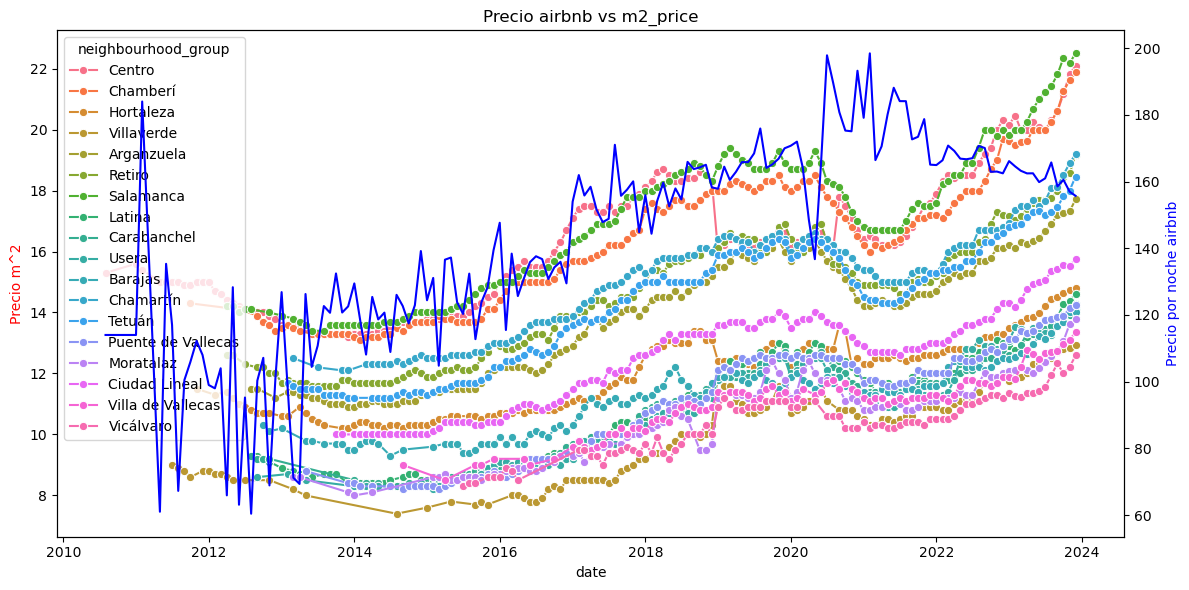

In [64]:
# 3. Precio airbnb vs m2_price 

# m2_price cuando el neighboor neighbourhood_group='Centro' o 'Salamanca' o 'Chamberi' o 'Chamartin'
df_m2_price = df[df['neighbourhood_group'].isin(['Centro', 'Salamanca', 'Chamberi', 'Chamartin'])]
df_m2_price = df_m2_price.groupby(['neighbourhood_group', 'date'], as_index=False)['m2_price'].mean()
df_m2_price

df_night_price = df[df['neighbourhood_group'].isin(['Centro', 'Salamanca', 'Chamberi', 'Chamartin'])]
df_night_price = df_night_price.groupby(['neighbourhood_group', 'date'], as_index=False)['nigth_price'].mean()

# grafica de precio por noche airbnb vs df_m2_price
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=df, x='date', y='m2_price', hue='neighbourhood_group', ax=ax1, marker='o')
ax1.set_ylabel('Precio m^2', color='red')
ax2 = ax1.twinx()
sns.lineplot(data=df_night_price.groupby('date', as_index=False)['nigth_price'].mean(), x='date', y='nigth_price', ax=ax2, color='blue')
ax2.set_ylabel('Precio por noche airbnb', color='blue')
plt.title("Precio airbnb vs m2_price")
plt.tight_layout()
plt.show()





In [85]:
# tabla de los distritos con el precio m2 mas alto
df.groupby('neighbourhood_group')['m2_price'].mean().sort_values(ascending=False).head(18)

neighbourhood_group
Salamanca             16.915515
Chamberí              16.279343
Centro                16.231677
Chamartín             15.048115
Retiro                14.442734
Tetuán                14.246279
Arganzuela            13.823507
Ciudad Lineal         12.453770
Hortaleza             11.935000
Barajas               11.194508
Villa de Vallecas     11.041978
Puente de Vallecas    11.004237
Usera                 10.917080
Carabanchel           10.881736
Latina                10.803206
Moratalaz             10.579722
Vicálvaro             10.347778
Villaverde            10.023661
Name: m2_price, dtype: float64

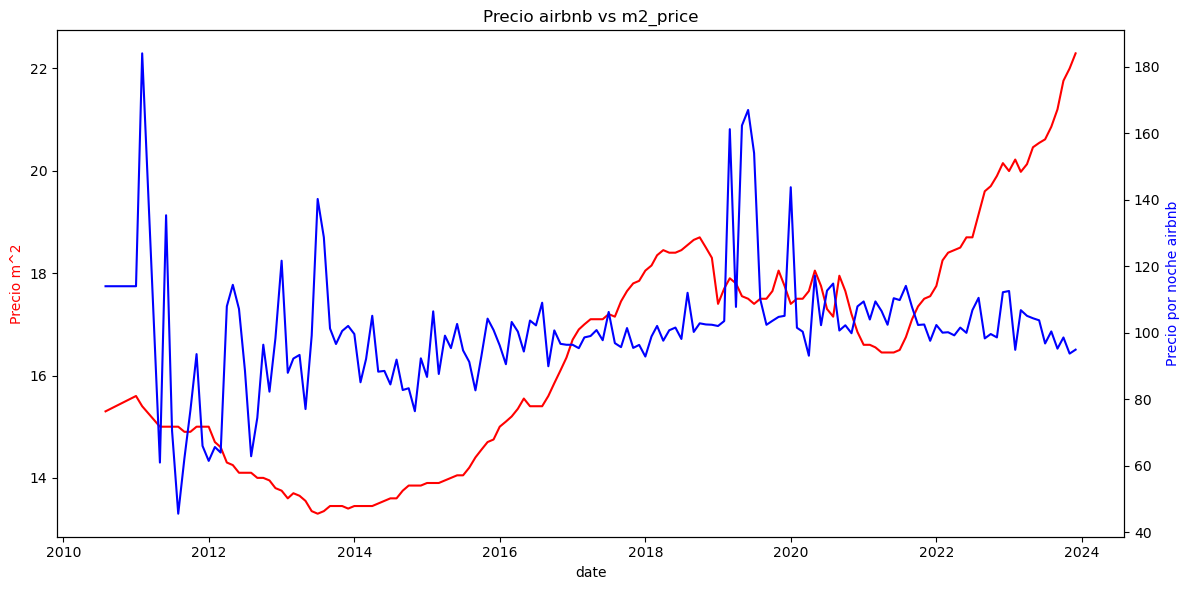

In [59]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=df_m2_price.groupby('date', as_index=False)['m2_price'].mean(), x='date', y='m2_price', ax=ax1, color='red')
ax1.set_ylabel('Precio m^2', color='red')
ax2 = ax1.twinx()
sns.lineplot(data=df.groupby('date', as_index=False)['nigth_price'].mean(), x='date', y='nigth_price', ax=ax2, color='blue')
ax2.set_ylabel('Precio por noche airbnb', color='blue')
plt.title("Precio airbnb vs m2_price")
plt.tight_layout()
plt.show()

In [49]:
df2 = df.groupby('date', as_index=False).agg({
    'm2_price': 'mean',
    'inflation': 'mean',
    'HICP': 'mean',
    'population_density': 'mean',
    'listings_count': 'sum',
    'minimum_nights': 'mean',
    'nigth_price': 'mean',
    'availability_365': 'mean',
    'listing_reviews': 'mean',
    'number_of_reviews': 'sum',
    'reviews_per_month': 'mean',
    'hosts_count': 'sum',
    'Private_room': 'sum',
    'Entire_home': 'sum',
    'Hotel_room': 'sum',
    'Shared_room': 'sum'
})

X = df2.select_dtypes(include=['float64', 'int64']).drop(columns=['m2_price'], errors='ignore')
y = df2['m2_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               m2_price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     90.68
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           2.84e-53
Time:                        15:55:04   Log-Likelihood:                -69.855
No. Observations:                 124   AIC:                             169.7
Df Residuals:                     109   BIC:                             212.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -32.3165      5

In [99]:

#  modelo de regresion con df quitando las fechas anteriores a 2014



df2 = df.groupby('date', as_index=False).agg({
    'm2_price': 'mean',
    'inflation': 'mean',
    'HICP': 'mean',
    'population_density': 'mean',
    'listings_count': 'sum',
    'minimum_nights': 'mean',
    'nigth_price': 'mean',
    'availability_365': 'mean',
    'listing_reviews': 'mean',
    'number_of_reviews': 'sum',
    'reviews_per_month': 'mean',
    'hosts_count': 'sum',
    'Private_room': 'sum',
    'Entire_home': 'sum',
    'Hotel_room': 'sum',
    'Shared_room': 'sum'
})

df2 = df2[df2['date'] >= '2014-01-01']


X = df2.select_dtypes(include=['float64', 'int64']).drop(columns=['m2_price'], errors='ignore')
y = df2['m2_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               m2_price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.47e-59
Time:                        16:33:08   Log-Likelihood:                 4.2746
No. Observations:                  96   AIC:                             21.45
Df Residuals:                      81   BIC:                             59.92
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -17.3558      4

In [138]:
#  modelo de regresion con df quitando las fechas anteriores a 2014


df2 = df.groupby('date', as_index=False).agg({
    'm2_price': 'mean',
    'population_density': 'mean',
    'listings_count': 'sum',
    'nigth_price': 'mean',
    'listing_reviews': 'mean',
    'number_of_reviews': 'sum',
    'reviews_per_month': 'mean',
    'hosts_count': 'sum',

})

df2 = df2[df2['date'] >= '2014-01-01']


X = df2.select_dtypes(include=['float64', 'int64']).drop(columns=['m2_price'], errors='ignore')
y = df2['m2_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               m2_price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     467.7
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           9.71e-67
Time:                        16:51:38   Log-Likelihood:               -0.35468
No. Observations:                  96   AIC:                             16.71
Df Residuals:                      88   BIC:                             37.22
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.3269      3

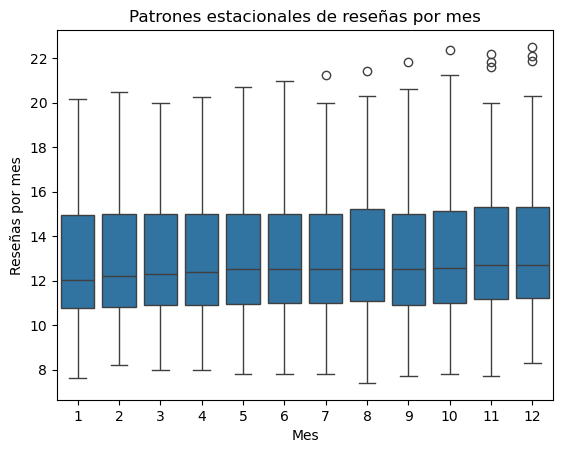

In [140]:
df['month'] = df['date'].dt.month
sns.boxplot(data=df, x='month', y='reviews_per_month')
plt.title("Patrones estacionales de reseñas por mes")
plt.xlabel("Mes")
plt.ylabel("Reseñas por mes")
plt.show()


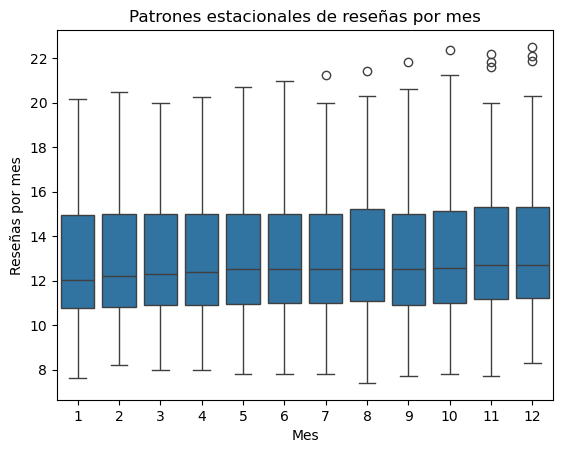

In [141]:
df['month'] = df['date'].dt.month
sns.boxplot(data=df, x='month', y='m2_price')
plt.title("Patrones estacionales de reseñas por mes")
plt.xlabel("Mes")
plt.ylabel("Reseñas por mes")
plt.show()


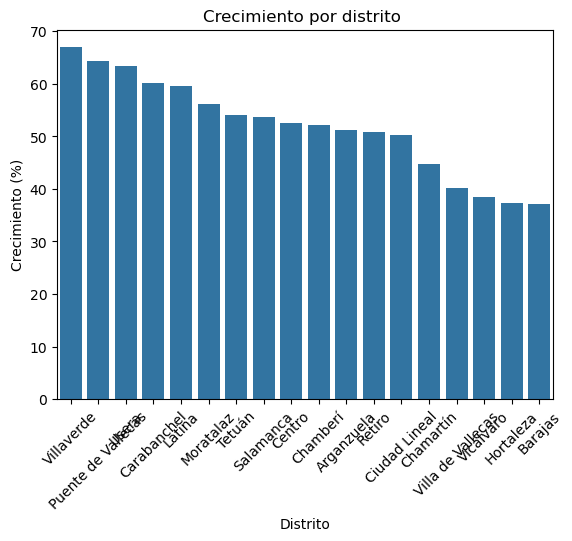

In [143]:
# 5. 
df['year'] = df['date'].dt.year
yearly_prices = df.groupby(['neighbourhood_group','year'], as_index=False)['m2_price'].mean()
growth = yearly_prices.groupby('neighbourhood_group')['m2_price'].apply(lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100).reset_index(name='growth_percent')

sns.barplot(data=growth.sort_values('growth_percent', ascending=False), x='neighbourhood_group', y='growth_percent')
plt.title("Crecimiento por distrito ")
plt.xticks(rotation=45)
plt.xlabel("Distrito")
plt.ylabel("Crecimiento (%)")
plt.show()


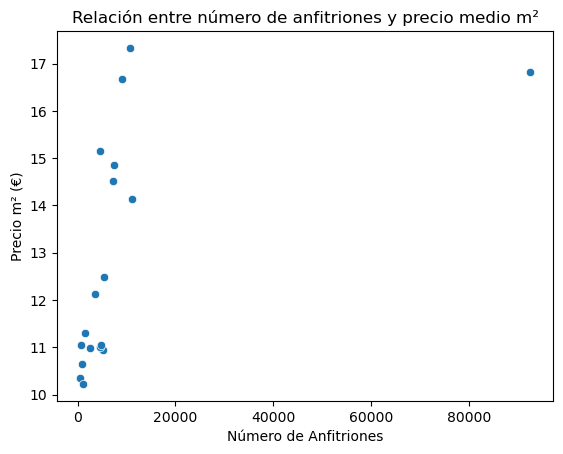

In [144]:
agg_neigh = df.groupby('neighbourhood_group', as_index=False).agg({'hosts_count':'sum','m2_price':'mean'})
sns.scatterplot(data=agg_neigh, x='hosts_count', y='m2_price')
plt.title("Relación entre num. anfitriones y precio ")
plt.xlabel("Número de anfitriones")
plt.ylabel("Precio ")
plt.show()

/var/folders/jy/h3d7x0px349032vjtclsskhm0000gn/T/ipykernel_77444/1628256398.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


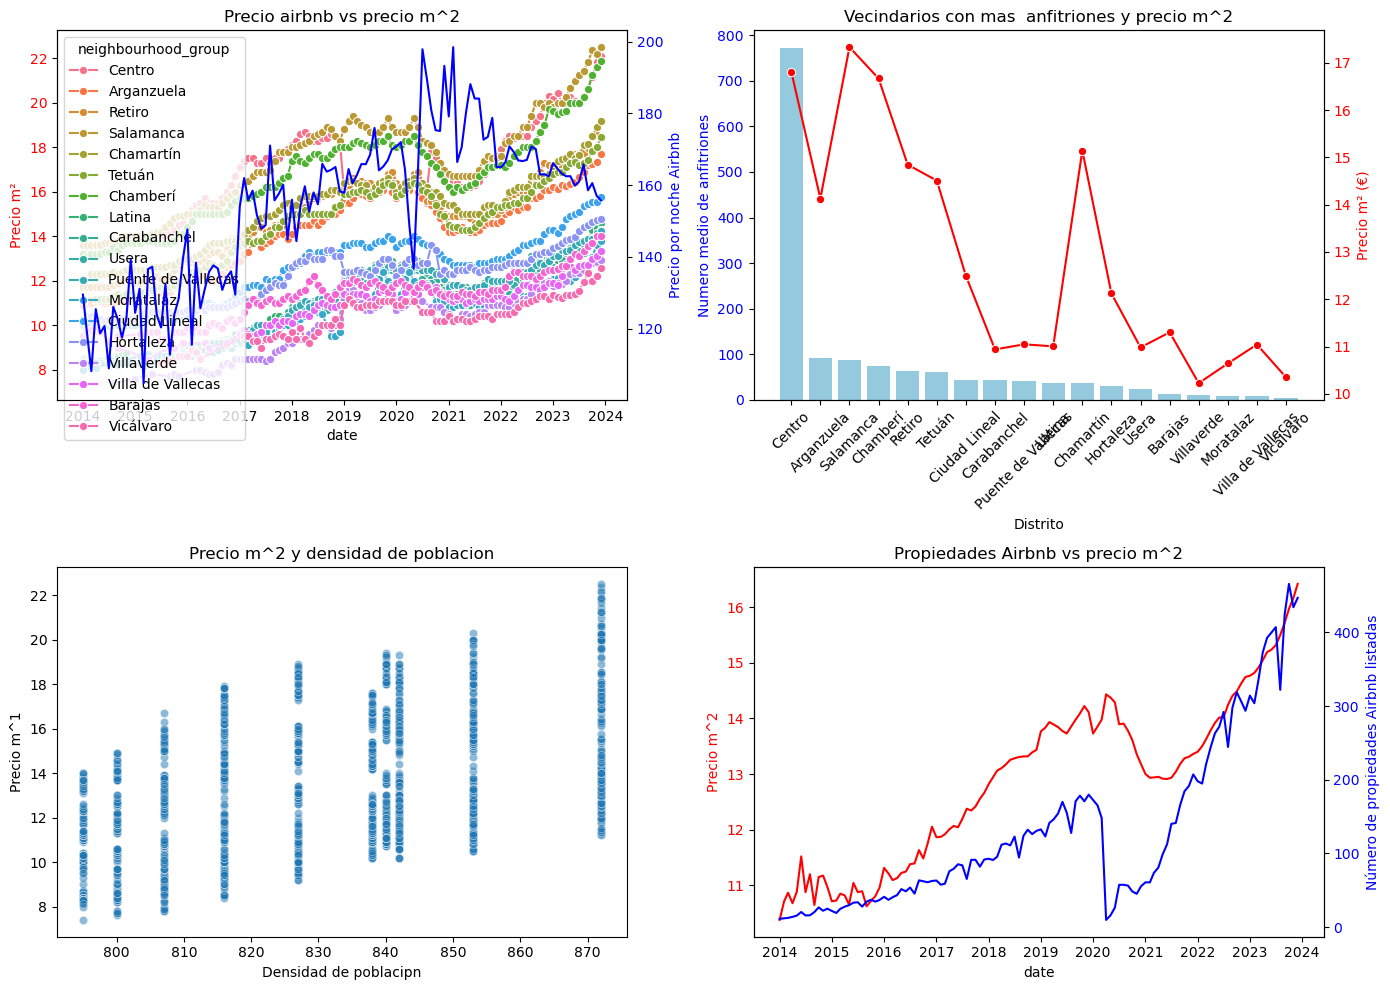

In [155]:

df_m2_price = df[df['neighbourhood_group'].isin(['Centro', 'Salamanca', 'Chamberi', 'Chamartin'])]
df_m2_price = df_m2_price.groupby(['neighbourhood_group', 'date'], as_index=False)['m2_price'].mean()

df_night_price = df[df['neighbourhood_group'].isin(['Centro', 'Salamanca', 'Chamberi', 'Chamartin'])]
df_night_price = df_night_price.groupby(['neighbourhood_group', 'date'], as_index=False)['nigth_price'].mean()

agg_neigh = df.groupby('neighbourhood_group', as_index=False).agg({
    'hosts_count':'mean',
    'm2_price':'mean'
})



# DASSHHH
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Precio airbnb vs m2_price 
ax1 = axs[0,0]
sns.lineplot(data=df, 
             x='date', y='m2_price', hue='neighbourhood_group', ax=ax1, marker='o')
ax1.set_ylabel('Precio m²', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax1_2 = ax1.twinx()
sns.lineplot(data=df_night_price.groupby('date', as_index=False)['nigth_price'].mean(), 
             x='date', y='nigth_price', ax=ax1_2, color='blue')
ax1_2.set_ylabel('Precio por noche Airbnb', color='blue')
ax1_2.tick_params(axis='y', labelcolor='blue')
axs[0,0].set_title("Precio airbnb vs precio m^2")

# 2. Anfitriones vs precio_metro cuadrado 
ax2 = axs[0,1]
sns.barplot(data=agg_neigh.sort_values('hosts_count', ascending=False), x='neighbourhood_group', 
            y='hosts_count', ax=ax2, color='skyblue')
ax2.set_xlabel("Distrito")
ax2.set_ylabel("Numero medio de anfitriones", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

ax2_2 = ax2.twinx()
sns.lineplot(data=agg_neigh.sort_values('hosts_count', ascending=False), 
             x='neighbourhood_group', y='m2_price', ax=ax2_2, color='red', marker='o')
ax2_2.set_ylabel("Precio m² (€)", color='red')
ax2_2.tick_params(axis='y', labelcolor='red')
axs[0,1].set_title("Vecindarios con mas  anfitriones y precio m^2")

# 3. m2_price vs population_density )
ax3 = axs[1,0]
sns.scatterplot(data=df, x='population_density', y='m2_price', alpha=0.5, ax=ax3)
ax3.set_title("Precio m^2 y densidad de poblacion")
ax3.set_xlabel("Densidad de poblacipn")
ax3.set_ylabel("Precio m^1")

# 4. Propriedades vs m2_price (Subplot 1,1)
ax4 = axs[1,1]
sns.lineplot(data=df.groupby('date', as_index=False)['m2_price'].mean(), x='date', y='m2_price', ax=ax4, color='red')
ax4.set_ylabel('Precio m^2', color='red')
ax4.tick_params(axis='y', labelcolor='red')

ax4_2 = ax4.twinx()
sns.lineplot(data=df.groupby('date', as_index=False)['listings_count'].mean(), x='date', y='listings_count', 
             ax=ax4_2, color='blue')
ax4_2.set_ylabel('Número de propiedades Airbnb listadas', color='blue')
ax4_2.tick_params(axis='y', labelcolor='blue')
axs[1,1].set_title("Propiedades Airbnb vs precio m^2")

plt.tight_layout()
plt.show()
